Dataset shape: (150, 5)
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
Target names: ['setosa' 'versicolor' 'virginica']
Sample data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Kernel: Linear SVM
Cross-Validation Scores: [0.95833333 1.         0.83333333 1.

/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


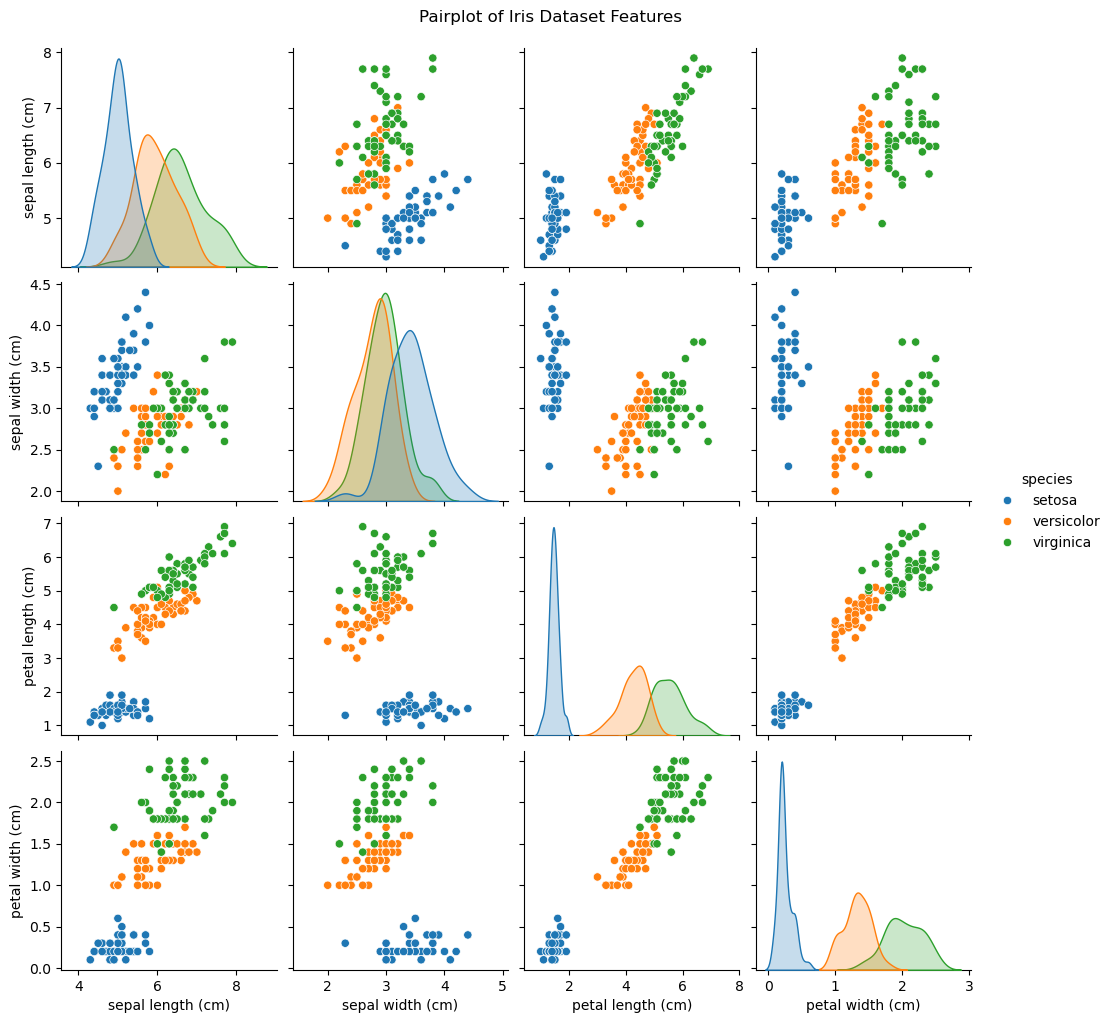

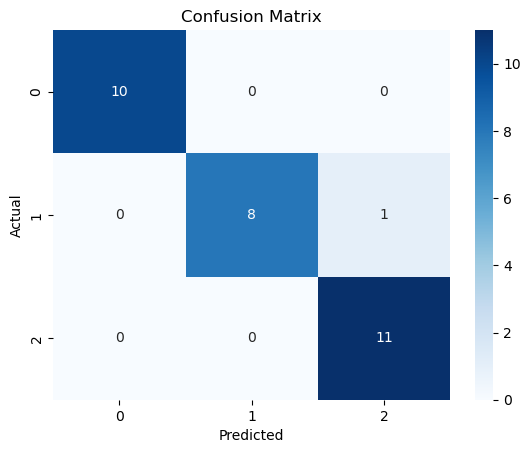

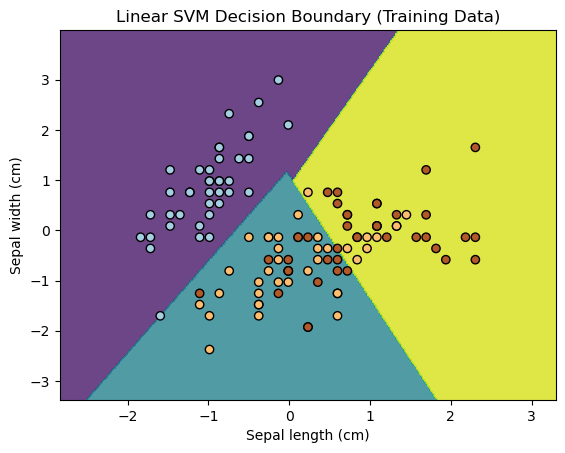


Kernel: Rbf SVM
Cross-Validation Scores: [0.95833333 1.         0.83333333 1.         0.95833333]
Mean CV Accuracy: 0.95
Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


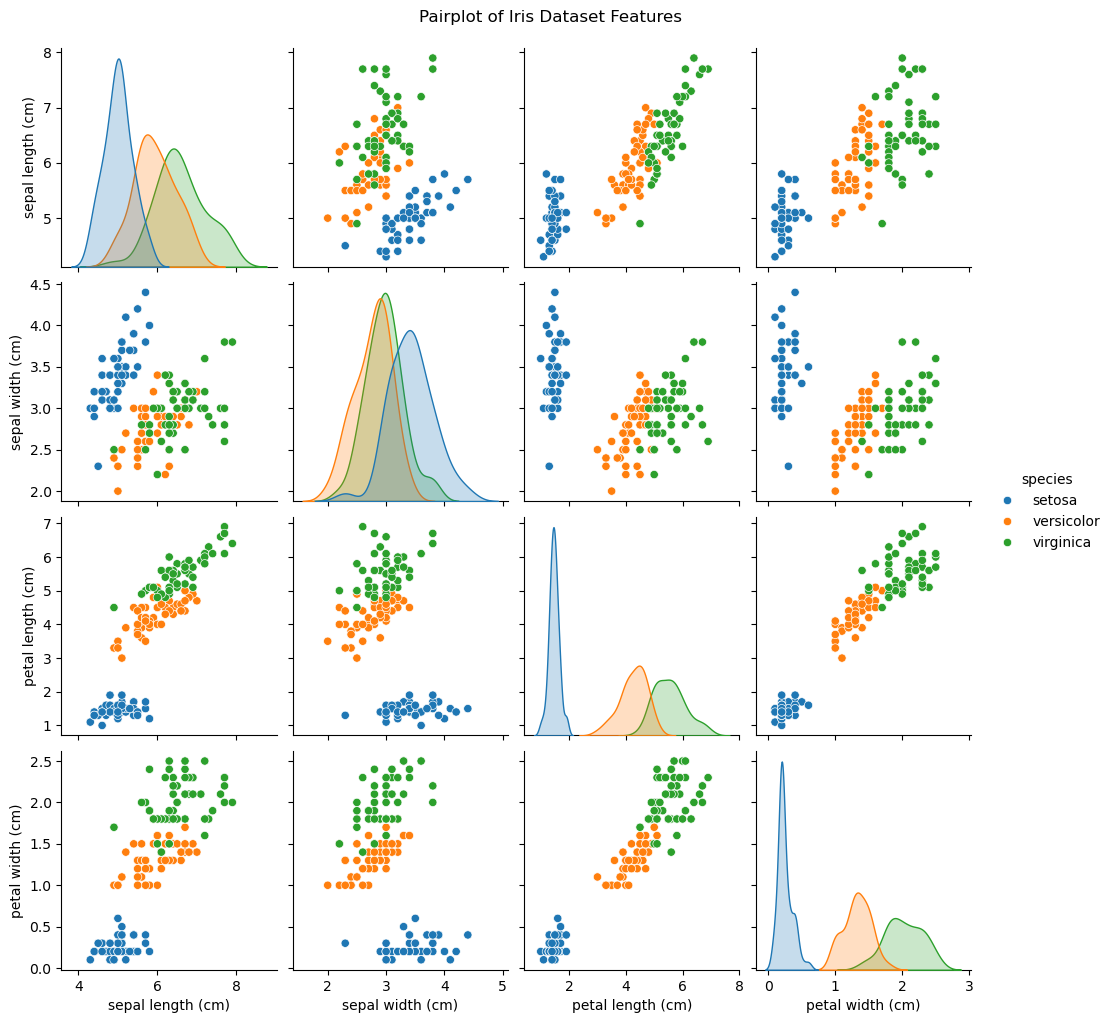

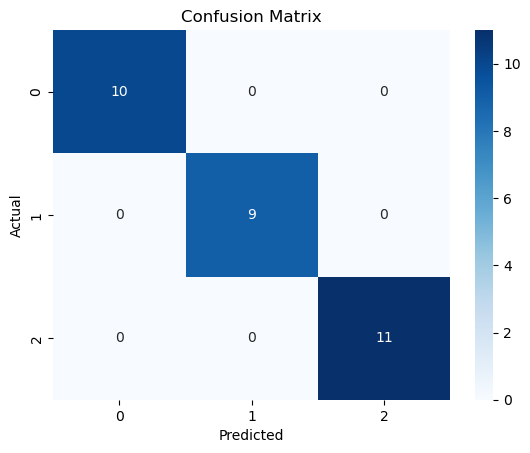

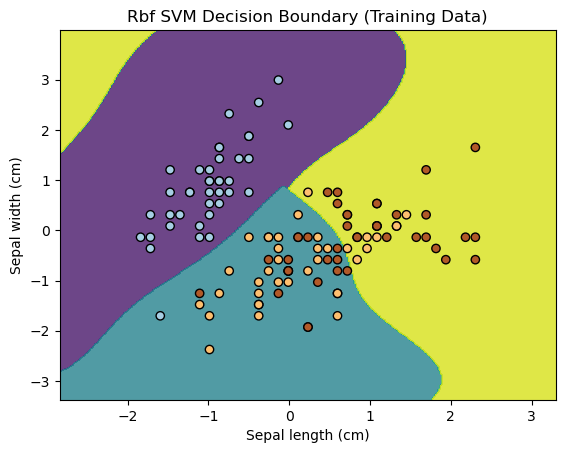


Kernel: Sigmoid SVM
Cross-Validation Scores: [0.95833333 0.95833333 0.83333333 0.875      0.91666667]
Mean CV Accuracy: 0.9083333333333334
Evaluation Metrics:
Accuracy: 0.9000
Precision: 0.9014
Recall: 0.9000
F1 Score: 0.8992

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


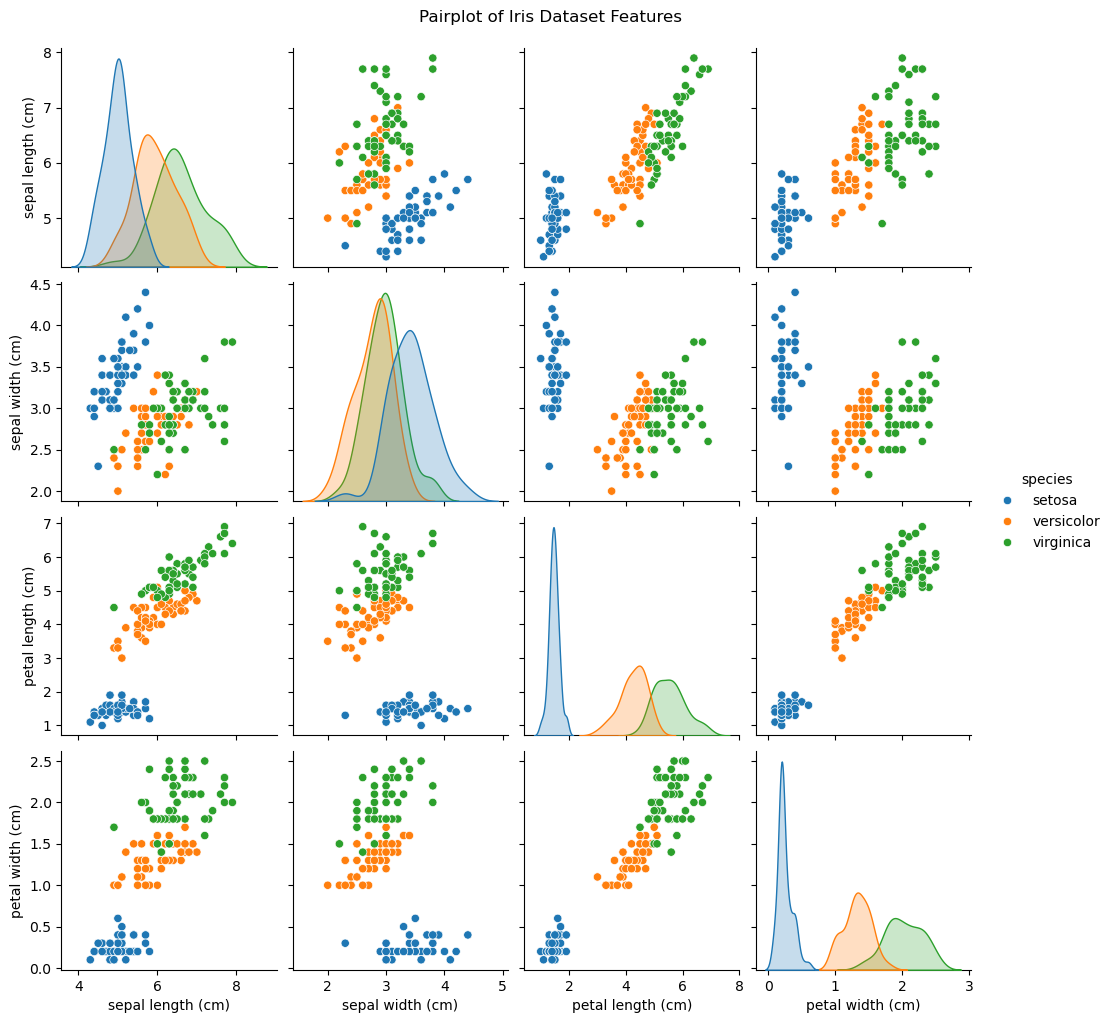

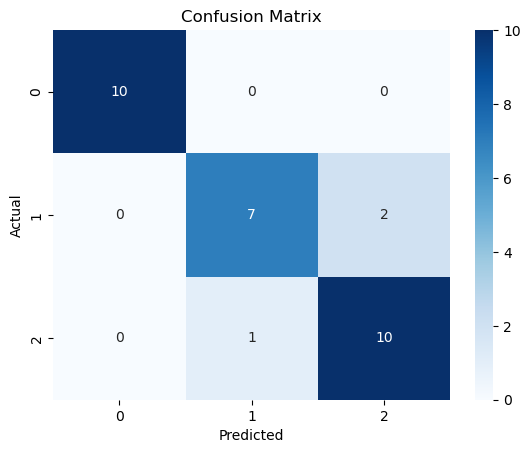

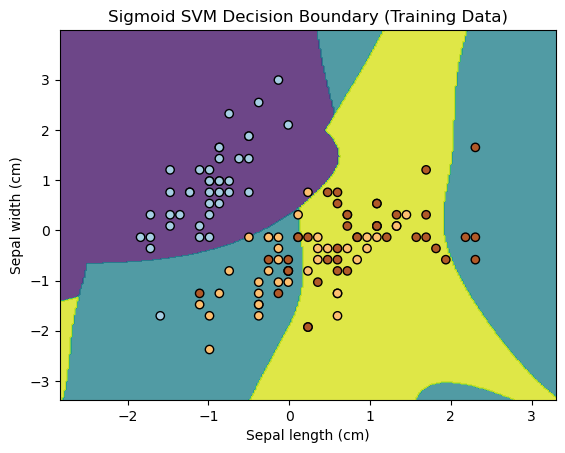


Kernel: Poly SVM
Cross-Validation Scores: [0.95833333 0.91666667 0.91666667 0.95833333 0.875     ]
Mean CV Accuracy: 0.925
Evaluation Metrics:
Accuracy: 0.9667
Precision: 0.9700
Recall: 0.9667
F1 Score: 0.9668

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/Users/chinthaharikareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


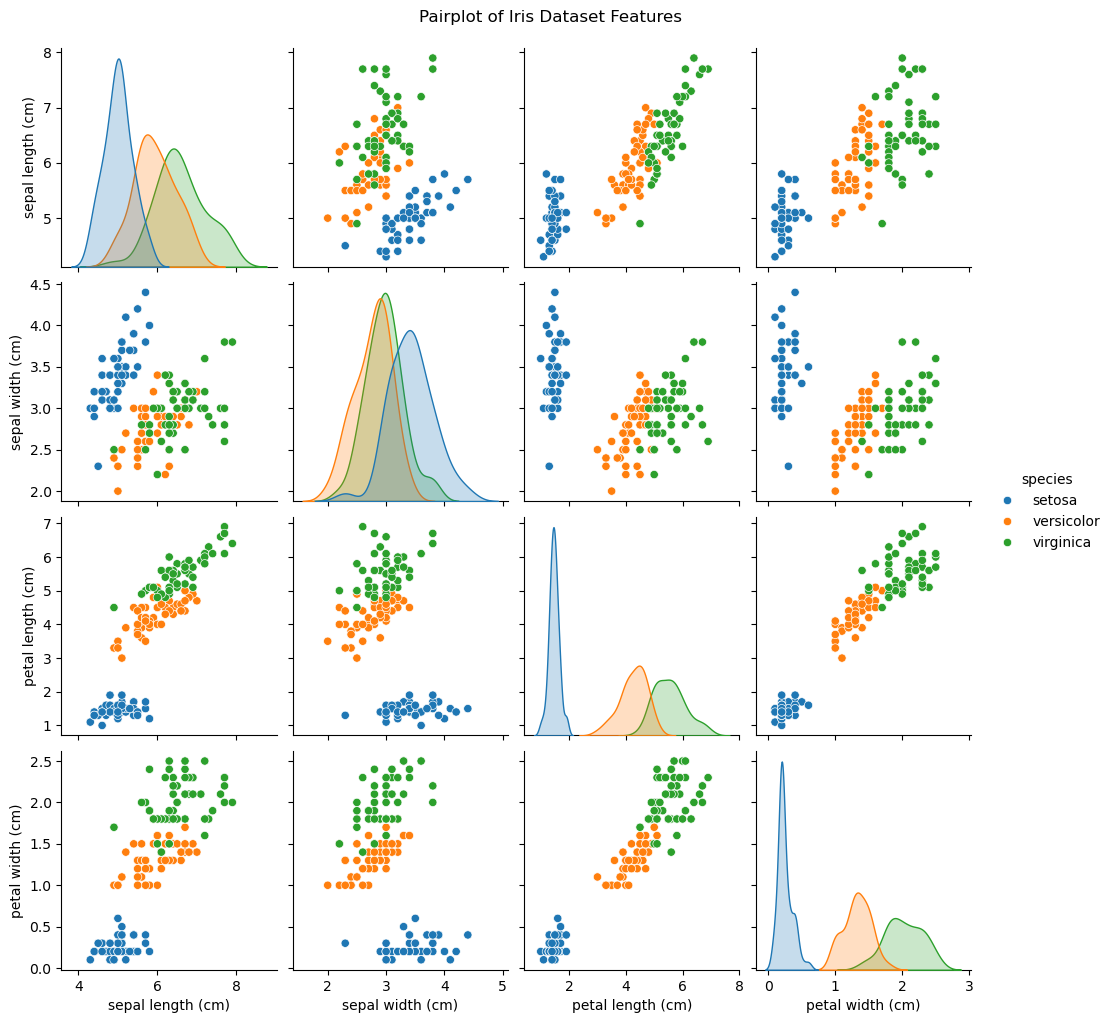

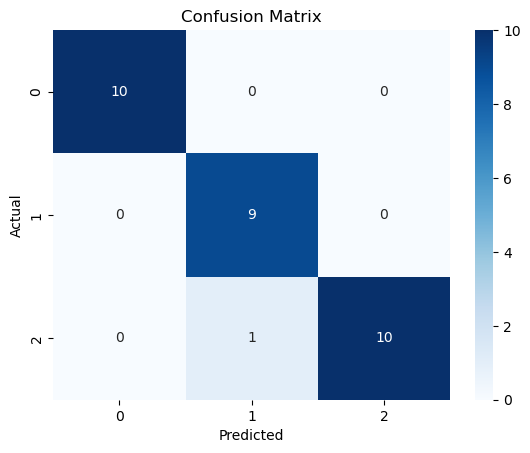

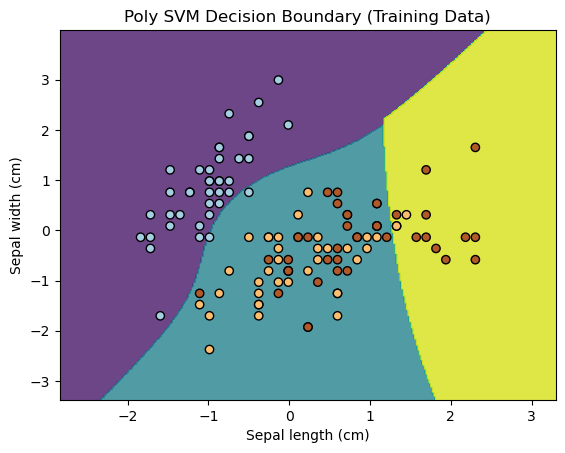

/var/folders/fx/br8qx3w52jg4lm6gl0fznjyc0000gn/T/ipykernel_36173/800779036.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=mean_cv_accuracies, palette='viridis')


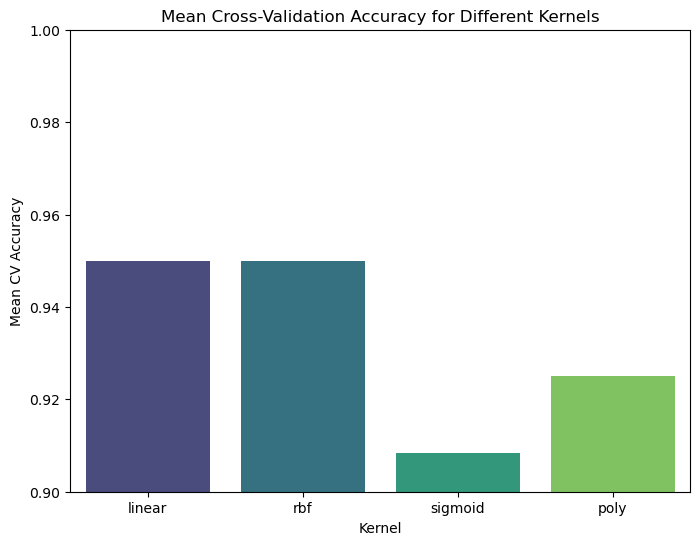


Mean Cross-Validation Accuracies:
    Kernel  Mean CV Accuracy
0   linear          0.950000
1      rbf          0.950000
2  sigmoid          0.908333
3     poly          0.925000


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for data exploration
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = target_names[y]

# Data exploration
print("Dataset shape:", iris_df.shape)
print("Columns:", iris_df.columns)
print("Target names:", target_names)
print("Sample data:\n", iris_df.head())

# Check for missing values (though the Iris dataset is clean)
print("Missing values:\n", iris_df.isnull().sum())

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Implementation with different kernels
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
mean_cv_accuracies = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    
    # Cross-validation
    cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    mean_cv_accuracy = np.mean(cv_scores)
    mean_cv_accuracies.append(mean_cv_accuracy)

    # Model fitting
    svm_model.fit(X_train_scaled, y_train)

    # Evaluation Metrics
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nKernel: {kernel.capitalize()} SVM")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Accuracy:", mean_cv_accuracy)
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Pairplot of features colored by species
    sns.pairplot(iris_df, hue='species', height=2.5)
    plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
    plt.show()

    # Confusion Matrix Heatmap
    conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    # Decision Boundary Plot (2D)
    def plot_decision_boundary(X, y, model, title):
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length (cm)')
        plt.ylabel('Sepal width (cm)')
        plt.title(title)
        plt.show()

    # Visualize decision boundary on training data (using only first two features)
    X_train_two_features = X_train_scaled[:, :2]  # Considering only first two features for visualization
    svm_model_2d = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model_2d.fit(X_train_two_features, y_train)
    plot_decision_boundary(X_train_two_features, y_train, svm_model_2d, f"{kernel.capitalize()} SVM Decision Boundary (Training Data)")

# Plotting mean cross-validation accuracies for different kernels
plt.figure(figsize=(8, 6))
sns.barplot(x=kernels, y=mean_cv_accuracies, palette='viridis')
plt.title('Mean Cross-Validation Accuracy for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Mean CV Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.show()

# Displaying the mean cross-validation accuracies in a table
cv_accuracy_df = pd.DataFrame({'Kernel': kernels, 'Mean CV Accuracy': mean_cv_accuracies})
print("\nMean Cross-Validation Accuracies:")
print(cv_accuracy_df)
